In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("fashion-mnist_test.csv")


In [3]:
X = df.drop("label", axis=1).values
y = df["label"].values


In [5]:
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.1982 - loss: 2.1617 - val_accuracy: 0.6165 - val_loss: 0.9958
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6493 - loss: 0.9621 - val_accuracy: 0.6930 - val_loss: 0.8033
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7013 - loss: 0.8133 - val_accuracy: 0.7355 - val_loss: 0.7328
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.7240 - loss: 0.7562 - val_accuracy: 0.7570 - val_loss: 0.6757
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.7302 - loss: 0.7139 - val_accuracy: 0.7565 - val_loss: 0.6807
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.7442 - loss: 0.6924 - val_accuracy: 0.7690 - val_loss: 0.6600
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7437 - loss: 0.6740 - val_accuracy: 0.7620 - val_loss: 0.6323
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.7527 - loss: 0.6618 - val_a

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


63/63 - 1s - 8ms/step - accuracy: 0.7845 - loss: 0.5970

Test accuracy: 0.7845


In [12]:
predictions = model.predict(X_test)



63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


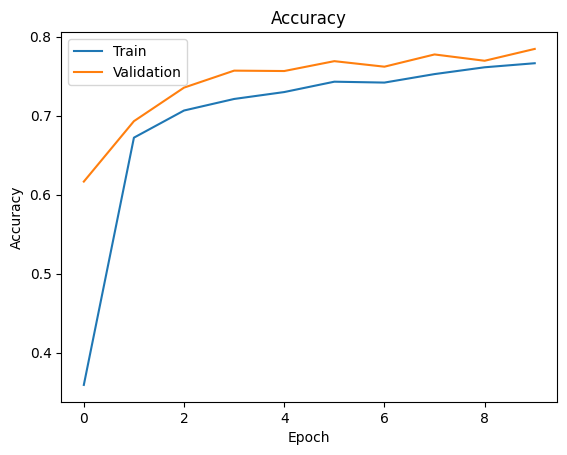

In [13]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend(),plt.title('Accuracy'),plt.xlabel('Epoch'),plt.ylabel('Accuracy')
plt.show()

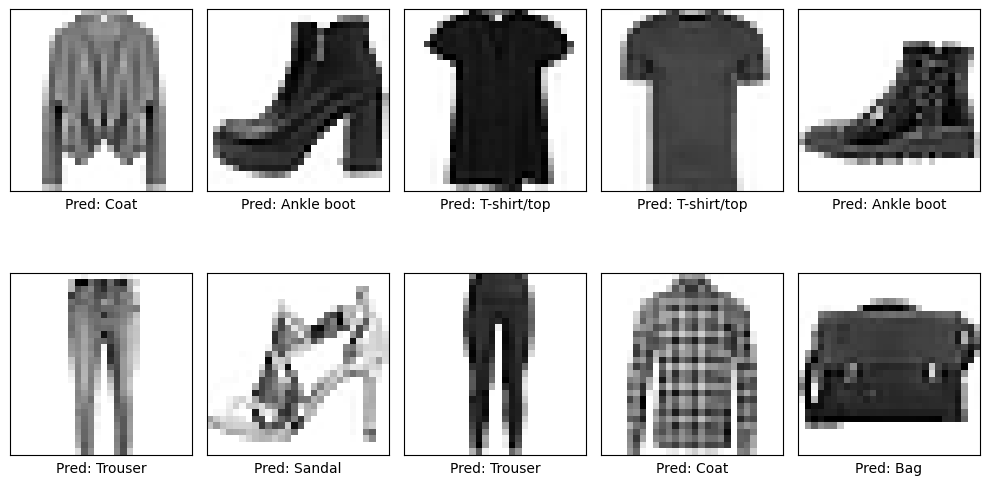

In [14]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predictions[i].argmax()]}")
plt.tight_layout()
plt.show()
